# **Konversi Statistika dan kebijakan**

## **Import library**

In [ ]:
pip install openpyxl


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

## **Preporcessing data**

In [ ]:
url='https://drive.google.com/file/d/1cise3_z4FW5mJ1Qfp9QK-8rf7MwLt3ka/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
df.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC
0,Wonerejo,1-Jan-19,12.0,0.0,8.7,0.0,11.8,3.1,0.0
1,Wonerejo,2-Jan-19,12.0,0.0,6.9,0.0,10.1,0.0,0.0
2,Wonerejo,3-Jan-19,8.5,0.0,7.3,0.0,6.0,0.0,0.0
3,Wonerejo,4-Jan-19,4.4,0.0,7.5,0.0,8.8,0.0,0.0
4,Wonerejo,5-Jan-19,3.7,0.0,9.3,0.0,10.4,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lokasi   6007 non-null   object 
 1   Tanggal  6007 non-null   object 
 2   PM10     6007 non-null   float64
 3   PM2.5    6007 non-null   float64
 4   SO2      6007 non-null   float64
 5   CO       6007 non-null   float64
 6   O3       6007 non-null   float64
 7   NO2      6007 non-null   float64
 8   HC       6007 non-null   float64
dtypes: float64(7), object(2)
memory usage: 422.5+ KB


### **Membagi Dataset**

In [ ]:
# Memfilter data untuk lokasi "Tandes"
df_tandes = df[df['Lokasi'] == 'Tandes']

# Reset index dan drop kolom nomor jika berasal dari CSV
df_tandes = df_tandes.reset_index(drop=True)

# Membagi data menjadi 80% untuk training dan 20% untuk testing berdasarkan indeks
split_index = int(len(df_tandes) * 0.8)
df_training_tandes = df_tandes.iloc[:split_index]
df_testing_tandes = df_tandes.iloc[split_index:]

# Menampilkan informasi dari kedua dataset
print(f"Data Training: {df_training_tandes.shape}")
print(f"Data Testing : {df_testing_tandes.shape}")


Data Training: (1410, 9)
Data Testing : (353, 9)


In [ ]:
df_training_tandes.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC
0,Tandes,1-Jan-20,19.0,55.6,21.2,39.1,35.0,2.5,0.0
1,Tandes,2-Jan-20,12.0,41.9,21.2,41.7,36.7,3.1,0.0
2,Tandes,3-Jan-20,21.0,58.1,23.1,36.5,36.7,2.5,0.0
3,Tandes,4-Jan-20,13.0,45.2,26.9,31.3,32.1,2.5,0.0
4,Tandes,5-Jan-20,12.0,38.7,35.6,23.3,27.1,2.5,0.0


In [ ]:
df_testing_tandes.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC
1410,Tandes,11-Nov-23,60.0,94.5,32.7,18.8,10.8,1.2,32.2
1411,Tandes,12-Nov-23,52.0,82.0,29.8,21.1,10.0,0.6,25.6
1412,Tandes,13-Nov-23,48.0,76.9,26.9,19.5,10.4,1.2,25.6
1413,Tandes,14-Nov-23,41.0,71.9,29.8,20.7,10.0,1.2,25.6
1414,Tandes,15-Nov-23,51.5,82.0,30.8,25.2,10.4,1.2,28.9


In [ ]:
# Simpan hasil prediksi ke dalam file Excel tanpa indeks
df_training_tandes.to_excel('Training_udara.xlsx', index=False)

In [ ]:
# Simpan hasil prediksi ke dalam file Excel tanpa indeks
df_testing_tandes.to_excel('Testing_udara.xlsx', index=False)

In [ ]:
df_testing_tandes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 1410 to 1762
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lokasi   353 non-null    object 
 1   Tanggal  353 non-null    object 
 2   PM10     353 non-null    float64
 3   PM2.5    353 non-null    float64
 4   SO2      353 non-null    float64
 5   CO       353 non-null    float64
 6   O3       353 non-null    float64
 7   NO2      353 non-null    float64
 8   HC       353 non-null    float64
dtypes: float64(7), object(2)
memory usage: 24.9+ KB


In [ ]:
df_training_tandes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lokasi   1410 non-null   object 
 1   Tanggal  1410 non-null   object 
 2   PM10     1410 non-null   float64
 3   PM2.5    1410 non-null   float64
 4   SO2      1410 non-null   float64
 5   CO       1410 non-null   float64
 6   O3       1410 non-null   float64
 7   NO2      1410 non-null   float64
 8   HC       1410 non-null   float64
dtypes: float64(7), object(2)
memory usage: 99.3+ KB


### **Mengcopy Data set**

In [ ]:
# Memfilter data untuk lokasi "Tandes" dan membuat df_tandes
df_tandes = df_training_tandes[df_training_tandes['Lokasi'] == 'Tandes'].copy()

# Menambahkan kolom "Max" dengan nilai maksimum dari parameter (PM10, PM2.5, SO2, CO, O3, NO2, HC)
parameter_columns = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']
df_tandes['Max'] = df_tandes[parameter_columns].max(axis=1)

# Menambahkan penilaian ISPU berdasarkan nilai "Max"
def ispu_category(value):
    if 1 <= value <= 50:
        return 'Baik'
    elif 51 <= value <= 100:
        return 'Sedang'
    elif 101 <= value <= 150:
        return 'Tidak Sehat'
    elif 151 <= value <= 200:
        return 'Sangat tidak sehat'
    else:
        return 'Berbahaya'

df_tandes['Kategori'] = df_tandes['Max'].apply(ispu_category)

# Membuat df_tandess yang sama dengan df_tandes
df_tandess = df_tandes.copy()

### **df_tandess**

In [ ]:
# Menampilkan hasil
df_tandes.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,Max,Kategori
0,Tandes,1-Jan-20,19.0,55.6,21.2,39.1,35.0,2.5,0.0,55.6,Sedang
1,Tandes,2-Jan-20,12.0,41.9,21.2,41.7,36.7,3.1,0.0,41.9,Baik
2,Tandes,3-Jan-20,21.0,58.1,23.1,36.5,36.7,2.5,0.0,58.1,Sedang
3,Tandes,4-Jan-20,13.0,45.2,26.9,31.3,32.1,2.5,0.0,45.2,Baik
4,Tandes,5-Jan-20,12.0,38.7,35.6,23.3,27.1,2.5,0.0,38.7,Baik


In [ ]:
# Simpan hasil prediksi ke dalam file Excel tanpa indeks
df_tandess.to_excel('training_Tandes_udara.xlsx', index=False)

### **df_tandess**

In [ ]:
df_tandess.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,Max,Kategori
0,Tandes,1-Jan-20,19.0,55.6,21.2,39.1,35.0,2.5,0.0,55.6,Sedang
1,Tandes,2-Jan-20,12.0,41.9,21.2,41.7,36.7,3.1,0.0,41.9,Baik
2,Tandes,3-Jan-20,21.0,58.1,23.1,36.5,36.7,2.5,0.0,58.1,Sedang
3,Tandes,4-Jan-20,13.0,45.2,26.9,31.3,32.1,2.5,0.0,45.2,Baik
4,Tandes,5-Jan-20,12.0,38.7,35.6,23.3,27.1,2.5,0.0,38.7,Baik


In [ ]:
df_tandess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lokasi    1410 non-null   object 
 1   Tanggal   1410 non-null   object 
 2   PM10      1410 non-null   float64
 3   PM2.5     1410 non-null   float64
 4   SO2       1410 non-null   float64
 5   CO        1410 non-null   float64
 6   O3        1410 non-null   float64
 7   NO2       1410 non-null   float64
 8   HC        1410 non-null   float64
 9   Max       1410 non-null   float64
 10  Kategori  1410 non-null   object 
dtypes: float64(8), object(3)
memory usage: 121.3+ KB


In [ ]:
df_tandess.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,Max,Kategori
0,Tandes,1-Jan-20,19.0,55.6,21.2,39.1,35.0,2.5,0.0,55.6,Sedang
1,Tandes,2-Jan-20,12.0,41.9,21.2,41.7,36.7,3.1,0.0,41.9,Baik
2,Tandes,3-Jan-20,21.0,58.1,23.1,36.5,36.7,2.5,0.0,58.1,Sedang
3,Tandes,4-Jan-20,13.0,45.2,26.9,31.3,32.1,2.5,0.0,45.2,Baik
4,Tandes,5-Jan-20,12.0,38.7,35.6,23.3,27.1,2.5,0.0,38.7,Baik


## **Proses 1 membuat algoritma dengan metode KNN**

In [ ]:
# Pilih variabel independen dan target
X = df_tandes[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']]
y = df_tandes['Kategori']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalisasi data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Mengaktifkan fungsi klasifikasi KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred = knn.predict(X_test)

# Evaluasi hasil prediksi
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

              Baik       0.92      0.94      0.93        81
         Berbahaya       0.80      0.50      0.62         8
Sangat tidak sehat       1.00      1.00      1.00         4
            Sedang       0.97      0.97      0.97       189

          accuracy                           0.95       282
         macro avg       0.92      0.85      0.88       282
      weighted avg       0.95      0.95      0.95       282



### **Grafik Line plot jumlah K=n**

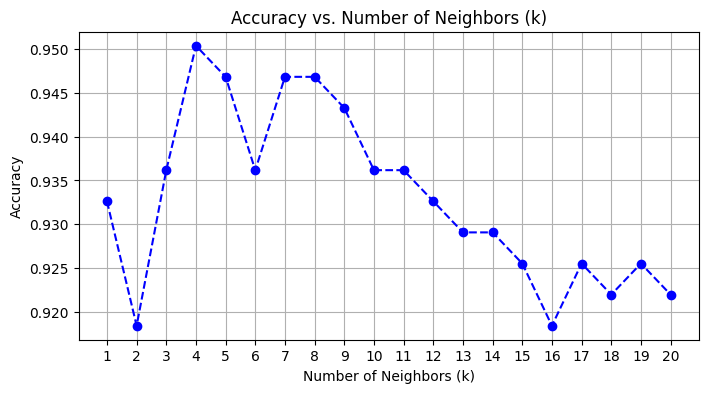

In [ ]:
# Menyimpan akurasi untuk setiap nilai k
k_range = range(1, 21)
accuracies = []

# Menghitung akurasi untuk nilai k yang berbeda
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

# Plot akurasi untuk setiap nilai k
plt.figure(figsize=(8, 4))
plt.plot(k_range, accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, 1))
plt.grid()
plt.show()

## **Proses 2 melakukan Prediksi pada  Data testing**

In [ ]:
# Jangan dirunning

# Hapus kolom yang tidak diperlukan pada data latih
df_tandes = df_tandes.drop(columns=['Lokasi', 'Tanggal'], errors='ignore')

# Pilih variabel independen dan target
X = df_tandes[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']]
y = df_tandes['Kategori']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalisasi data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Mengaktifkan fungsi klasifikasi KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred = knn.predict(X_test)

# Hapus kolom yang tidak diperlukan pada data testing kolom Nomor
df_testing_tandes = df_testing_tandes.loc[:, ~df_testing_tandes.columns.str.contains('^Nomor')]

# Pilih fitur yang sama dengan data latih
X_new = df_testing_tandes[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']]

# Standarisasi data baru dengan scaler yang sudah dilatih
X_new_scaled = scaler.transform(X_new)

# Prediksi kualitas udara untuk data baru
predictions = knn.predict(X_new_scaled)

# Menambahkan hasil prediksi ke data baru tanpa menghapus kolom 'Lokasi' dan 'Tanggal'
df_testing_tandes['kategori'] = predictions

# Tampilkan hasil prediksi beserta lokasi dan tanggal
df_tandes_testing_result = df_testing_tandes.reset_index(drop=True)
print("Prediksi Kualitas Udara untuk data baru:")
df_tandes_testing_result.head()

Prediksi Kualitas Udara untuk data baru:


,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,kategori
0,Tandes,11-Nov-23,60.0,94.5,32.7,18.8,10.8,1.2,32.2,Sedang
1,Tandes,12-Nov-23,52.0,82.0,29.8,21.1,10.0,0.6,25.6,Sedang
2,Tandes,13-Nov-23,48.0,76.9,26.9,19.5,10.4,1.2,25.6,Sedang
3,Tandes,14-Nov-23,41.0,71.9,29.8,20.7,10.0,1.2,25.6,Sedang
4,Tandes,15-Nov-23,51.5,82.0,30.8,25.2,10.4,1.2,28.9,Sedang


In [ ]:
# Hapus kolom yang tidak diperlukan pada data testing kolom Nomor
df_testing_tandes = df_testing_tandes.loc[:, ~df_testing_tandes.columns.str.contains('^Nomor')]

# Pilih fitur yang sama dengan data latih
X_new = df_testing_tandes[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']]

# Standarisasi data baru dengan scaler yang sudah dilatih
X_new_scaled = scaler.transform(X_new)

# Prediksi kualitas udara untuk data baru
predictions = knn.predict(X_new_scaled)

# Menambahkan hasil prediksi ke data baru tanpa menghapus kolom 'Lokasi' dan 'Tanggal'
df_testing_tandes['kategori'] = predictions

# Tampilkan hasil prediksi beserta lokasi dan tanggal
df_tandes_testing_result = df_testing_tandes.reset_index(drop=True)
df_tandes_testing_result.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,kategori
0,Tandes,11-Nov-23,60.0,94.5,32.7,18.8,10.8,1.2,32.2,Sedang
1,Tandes,12-Nov-23,52.0,82.0,29.8,21.1,10.0,0.6,25.6,Sedang
2,Tandes,13-Nov-23,48.0,76.9,26.9,19.5,10.4,1.2,25.6,Sedang
3,Tandes,14-Nov-23,41.0,71.9,29.8,20.7,10.0,1.2,25.6,Sedang
4,Tandes,15-Nov-23,51.5,82.0,30.8,25.2,10.4,1.2,28.9,Sedang


### **Classification report data Testing**

In [ ]:
# Tampilkan classification report
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

              Baik       0.92      0.91      0.92        94
         Berbahaya       0.75      0.60      0.67        15
Sangat tidak sehat       1.00      1.00      1.00         9
            Sedang       0.95      0.97      0.96       235

          accuracy                           0.94       353
         macro avg       0.91      0.87      0.89       353
      weighted avg       0.94      0.94      0.94       353



### **Menggabungkan kolom data training dan hasil prediksi data testing**

In [ ]:
# Hapus kolom yang tidak diperlukan dari df_tandess
df_tandess = df_tandess.drop(columns=['Max'], errors='ignore')

# Gabungkan df_tandess dan df_tandes_testing_result
df_tandes_combine = pd.concat([df_tandess, df_tandes_testing_result], ignore_index=True)

# Ganti NaN di 'Kategori' dengan nilai dari 'kategori'
df_tandes_combine['Kategori'] = df_tandes_combine['Kategori'].fillna(df_tandes_combine['kategori'])

# Hapus kolom 'kategori' yang sudah tidak diperlukan
df_tandes_combine = df_tandes_combine.drop(columns=['kategori'], errors='ignore')

# Tampilkan hasil
df_tandes_combine

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,Kategori
0,Tandes,1-Jan-20,19.0,55.6,21.2,39.1,35.0,2.5,0.0,Sedang
1,Tandes,2-Jan-20,12.0,41.9,21.2,41.7,36.7,3.1,0.0,Baik
2,Tandes,3-Jan-20,21.0,58.1,23.1,36.5,36.7,2.5,0.0,Sedang
3,Tandes,4-Jan-20,13.0,45.2,26.9,31.3,32.1,2.5,0.0,Baik
4,Tandes,5-Jan-20,12.0,38.7,35.6,23.3,27.1,2.5,0.0,Baik
...,...,...,...,...,...,...,...,...,...,...
1758,Tandes,24-Oct-24,16.0,68.2,48.1,15.7,10.8,17.5,4.4,Sedang
1759,Tandes,25-Oct-24,16.0,79.4,48.1,15.0,10.8,17.5,5.6,Sedang
1760,Tandes,26-Oct-24,16.0,63.2,48.1,14.4,11.2,17.5,1.1,Sedang
1761,Tandes,27-Oct-24,16.0,61.9,46.2,12.4,11.2,17.5,2.2,Sedang


### **Pengecekan NaN pada data**

In [ ]:
print("\nJumlah NaN setelah penggabungan:")
print(df_tandes_combine.isnull().sum())


Jumlah NaN setelah penggabungan:
Lokasi      0
Tanggal     0
PM10        0
PM2.5       0
SO2         0
CO          0
O3          0
NO2         0
HC          0
Kategori    0
dtype: int64


## **Proses 3 melakukan Prediksi 30 hari kedepan dengan menggabungkan 2 data sebelumnya**

In [ ]:
# Hapus kolom yang tidak diperlukan pada data latih
df_tandes = df_tandes_combine.drop(columns=['Lokasi', 'Tanggal'], errors='ignore')

# Pilih variabel independen dan target
X = df_tandes[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']]
y = df_tandes['Kategori']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalisasi data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Mengaktifkan fungsi klasifikasi KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Ambil tanggal terakhir dari data dan tanggal awal prediksi
last_date = pd.to_datetime("2024-10-28")    # Tanggal terakhir dari data
start_date = last_date + timedelta(days=1)  # Tanggal Mulai prediksi
lokasi = 'Tandes'

# Buat list untuk menyimpan hasil prediksi
predictions_list = []

# Buat DataFrame untuk 30 hari ke depan
for i in range(30):
    new_date = start_date + timedelta(days=i)

    # Ambil nilai terakhir dari data gabungan untuk prediksi
    last_row = df_tandes.iloc[-1]

    # Buat data baru berdasarkan nilai terakhir
    new_row = {
        'PM10': np.random.normal(last_row['PM10'], 10),
        'PM2.5': np.random.normal(last_row['PM2.5'], 5),
        'SO2': np.random.normal(last_row['SO2'], 2),
        'CO': np.random.normal(last_row['CO'], 2),
        'O3': np.random.normal(last_row['O3'], 3),
        'NO2': np.random.normal(last_row['NO2'], 2),
        'HC': np.random.normal(last_row['HC'], 5),
    }
    predictions_list.append(new_row)

# Buat DataFrame untuk 30 hari ke depan
df_future = pd.DataFrame(predictions_list)

# Standarisasi data baru dengan scaler yang sudah dilatih
X_future_scaled = scaler.transform(df_future)

# Prediksi kualitas udara untuk data baru
predictions = knn.predict(X_future_scaled)

# Buat DataFrame hasil prediksi
df_predicted = pd.DataFrame({
    'Lokasi': lokasi,
    'Tanggal': [(start_date + timedelta(days=i)).strftime('%d-%b-%y') for i in range(30)],
    'PM10': df_future['PM10'],
    'PM2.5': df_future['PM2.5'],
    'SO2': df_future['SO2'],
    'CO': df_future['CO'],
    'O3': df_future['O3'],
    'NO2': df_future['NO2'],
    'HC': df_future['HC'],
    'kategori': predictions
})

# Tampilkan hasil prediksi
df_predicted.tail()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,kategori
25,Tandes,23-Nov-24,6.126131,53.805301,45.056132,11.825106,7.946547,15.812250,9.004120,Sedang
26,Tandes,24-Nov-24,-6.245825,65.098781,46.371130,11.656855,11.486082,16.785452,7.602005,Baik
27,Tandes,25-Nov-24,23.542779,63.006644,47.727695,13.191409,8.255560,17.862994,7.103766,Sedang
28,Tandes,26-Nov-24,16.370347,60.713409,47.275162,10.123211,8.558535,20.683377,5.682921,Sedang
29,Tandes,27-Nov-24,11.460944,65.795071,45.899382,12.108169,17.801507,17.734744,5.389957,Sedang


### **Save data hasil Prediksi**

In [ ]:
# Simpan hasil prediksi ke dalam file CSV tanpa indeks
df_predicted.to_csv('prediksi_kualitas_udara.csv', index=False)

### **Classification report data prediksi**

In [ ]:
# Prediksi dengan data uji
y_pred = knn.predict(X_test)

# Buat classification report
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Tampilkan hasil
print("Classification Report:")
print(report)
print(f"Accuracy Prediksi data udara : {accuracy:.2f}%")

Classification Report:
                    precision    recall  f1-score   support

              Baik       0.92      0.91      0.92        94
         Berbahaya       0.75      0.60      0.67        15
Sangat tidak sehat       1.00      1.00      1.00         9
            Sedang       0.95      0.97      0.96       235

          accuracy                           0.94       353
         macro avg       0.91      0.87      0.89       353
      weighted avg       0.94      0.94      0.94       353

Accuracy Prediksi data udara : 0.94%


### **Line Chart**

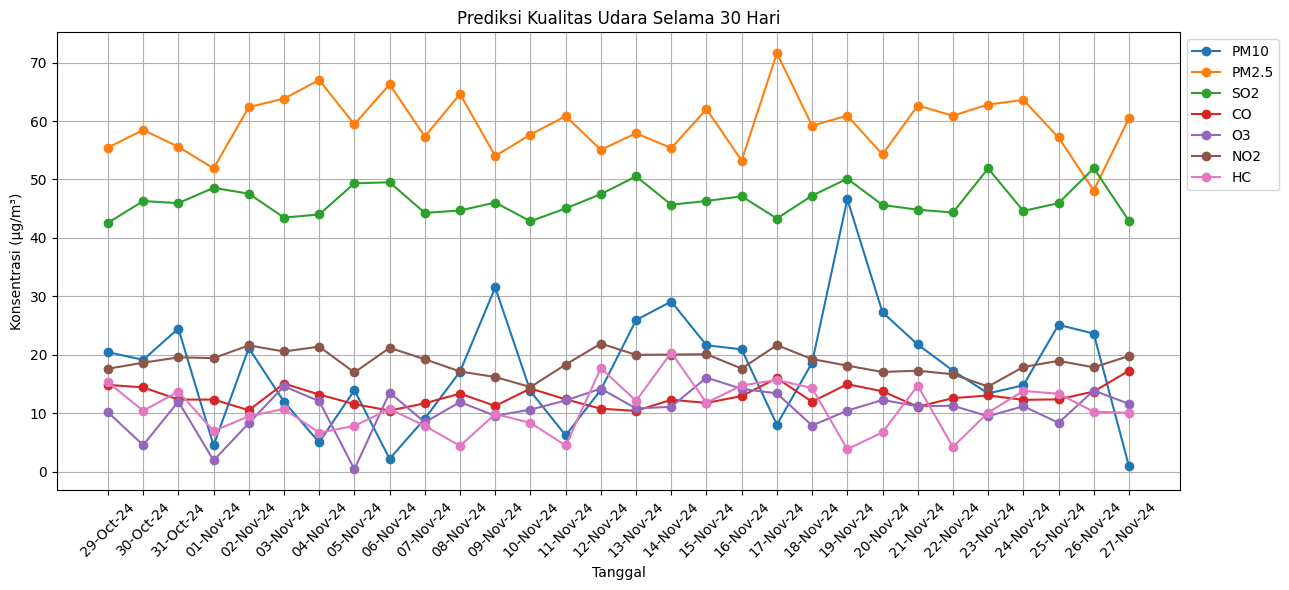

In [ ]:
# Mengatur ukuran grafik
plt.figure(figsize=(12, 6))

# Membuat line chart untuk PM10, PM2.5, SO2, CO, O3, NO2, HC
plt.plot(df_predicted['Tanggal'], df_predicted['PM10'], label='PM10', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['PM2.5'], label='PM2.5', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['SO2'], label='SO2', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['CO'], label='CO', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['O3'], label='O3', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['NO2'], label='NO2', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['HC'], label='HC', marker='o')

# Menambahkan judul dan label
plt.title('Prediksi Kualitas Udara Selama 30 Hari')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi (µg/m³)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Menempatkan legenda di luar grafik
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Menampilkan grafik
plt.show()

### **Bar Chart**

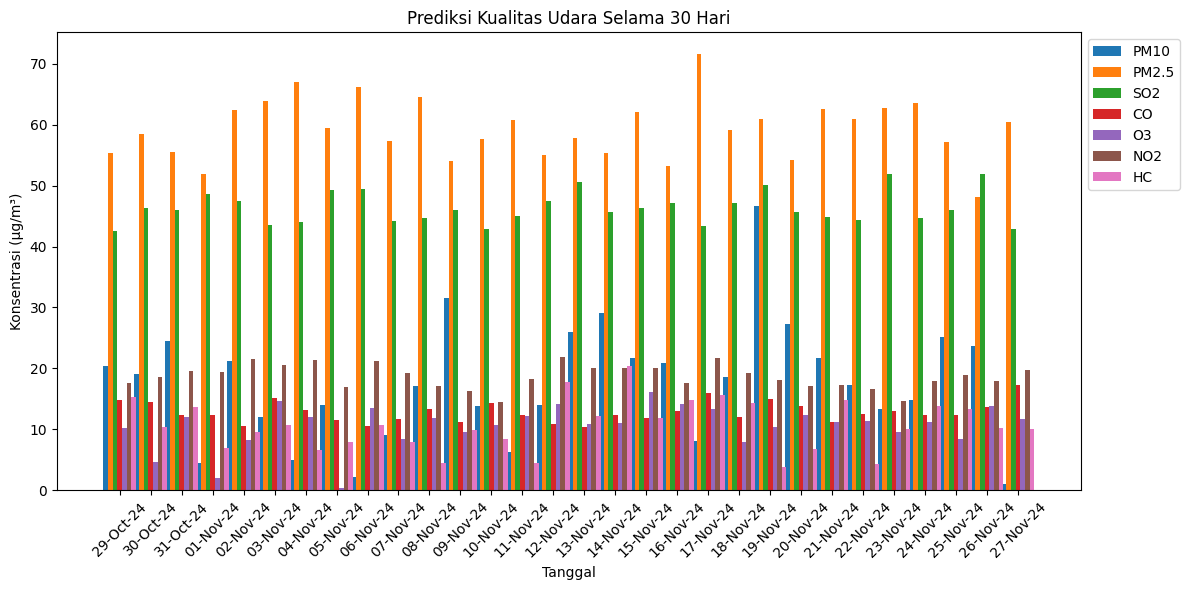

In [ ]:
# Mengatur ukuran grafik
plt.figure(figsize=(12, 6))

# Menentukan lebar bar
bar_width = 0.15
index = range(len(df_predicted))

# Membuat bar chart untuk setiap parameter
plt.bar(index, df_predicted['PM10'], bar_width, label='PM10')
plt.bar([i + bar_width for i in index], df_predicted['PM2.5'], bar_width, label='PM2.5')
plt.bar([i + 2 * bar_width for i in index], df_predicted['SO2'], bar_width, label='SO2')
plt.bar([i + 3 * bar_width for i in index], df_predicted['CO'], bar_width, label='CO')
plt.bar([i + 4 * bar_width for i in index], df_predicted['O3'], bar_width, label='O3')
plt.bar([i + 5 * bar_width for i in index], df_predicted['NO2'], bar_width, label='NO2')
plt.bar([i + 6 * bar_width for i in index], df_predicted['HC'], bar_width, label='HC')

# Menambahkan judul dan label
plt.title('Prediksi Kualitas Udara Selama 30 Hari')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi (µg/m³)')
plt.xticks([i + 3 * bar_width for i in index], df_predicted['Tanggal'], rotation=45)

# Menempatkan legenda di luar grafik
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

# Menampilkan grafik
plt.show()

### **Pie Chart**

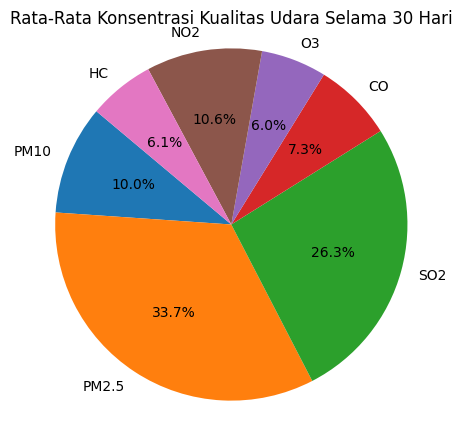

In [ ]:
# Menghitung rata-rata untuk setiap parameter
average_values = df_predicted[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']].mean()

# Mengatur ukuran grafik
plt.figure(figsize=(5, 5))

# Membuat pie chart
plt.pie(average_values, labels=average_values.index, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Rata-Rata Konsentrasi Kualitas Udara Selama 30 Hari')

# Menampilkan grafik
plt.axis('equal')
plt.show()

# **Konversi Intuisi dan wawasan data**